AUC-ROC: 0.91


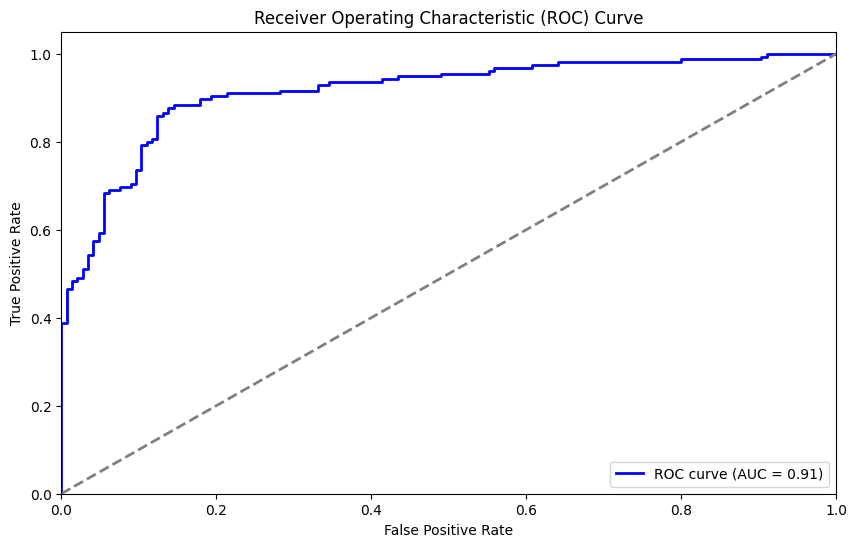

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Gerar dados de exemplo
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Dividir dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_scores = model.predict_proba(X_test)[:, 1]

# Calcular FPR, TPR e limiares para a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calcular AUC-ROC
auc_roc = roc_auc_score(y_test, y_scores)
print(f"AUC-ROC: {auc_roc:.2f}")

# Plotar a curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {auc_roc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
